In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import os,glob
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import ast
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate,Dropout,LeakyReLU
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Input,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.models import Model
#import warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
# df=pd.read_csv('articles.csv')

df=pd.read_csv('drive/MyDrive/Deep_Learning/guardian_articles.csv')
# dropping the rows having NaN values
df = df.dropna()

In [42]:
df

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
0,us-news/2016/jan/31/iowa-caucus-underdog-candi...,US news,Iowa underdogs put on brave faces despite all ...,https://www.theguardian.com/us-news/2016/jan/3...,As polling day looms and the cameras turn only...,2016-01-31T23:53:37Z,1
1,us-news/2016/jan/31/iowa-caucus-worlds-most-pa...,US news,Iowa caucus: hologram eagle and Jesus star on ...,https://www.theguardian.com/us-news/2016/jan/3...,"In Des Moines on Sunday, the Guardian was give...",2016-01-31T23:46:28Z,2
2,world/2016/jan/31/tanzania-britsh-helicopter-p...,World news,British pilot in Tanzania 'manoeuvred ​to save...,https://www.theguardian.com/world/2016/jan/31/...,A British pilot who was shot dead by an elepha...,2016-01-31T23:43:48Z,3
3,football/2016/jan/31/late-winner-gets-usa-off-...,Football,USA 3-2 Iceland | International friendly match...,https://www.theguardian.com/football/2016/jan/...,USA took a step toward shaking off the ghosts ...,2016-01-31T23:30:49Z,4
4,football/2016/jan/31/blackburn-paul-lambert-ox...,Football,Reinvigorated Paul Lambert reflects after impr...,https://www.theguardian.com/football/2016/jan/...,"The clean-shaven, spectacle free and suspiciou...",2016-01-31T22:30:10Z,5
...,...,...,...,...,...,...,...
149834,world/2022/jun/21/marble-head-of-hercules-pull...,World news,Marble head of Hercules pulled up from Roman s...,https://www.theguardian.com/world/2022/jun/21/...,"For archaeologists, it’s the underwater find t...",2022-06-21T17:31:32Z,149835
149835,music/2022/jun/22/i-got-sick-of-talking-about-...,Music,‘I got sick of talking about myself’: Spacey J...,https://www.theguardian.com/music/2022/jun/22/...,"From under a mop of curls, Caleb Harper – Spac...",2022-06-21T17:30:09Z,149836
149836,australia-news/2022/jun/22/the-small-town-with...,Australia news,The small town with a big potato that inspired...,https://www.theguardian.com/australia-news/202...,"Robertson is a small, pretty town perched on t...",2022-06-21T17:30:09Z,149837
149837,australia-news/2022/jun/22/power-to-ban-citize...,Australia news,Power to ban citizens from re-entering Austral...,https://www.theguardian.com/australia-news/202...,A high court decision striking down the home a...,2022-06-21T17:30:08Z,149838


In [43]:
df['text']=df['bodyContent']
df['sentiment']=df['sectionName']

In [44]:
# Filter the dataset by the two most frequent class
df = df[df["sentiment"].isin(["Sport", "Politics"])]

In [45]:
df.columns

Index(['article_id', 'sectionName', 'webTitle', 'webUrl', 'bodyContent',
       'webPublicationDate', 'id', 'text', 'sentiment'],
      dtype='object')

In [46]:
df

,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id,text,sentiment
11,sport/blog/2016/jan/31/sport-untouchables-drug...,Sport,Sport may need its own Untouchables to root ou...,https://www.theguardian.com/sport/blog/2016/ja...,Remember that scene from The Untouchables when...,2016-01-31T22:08:00Z,12,Remember that scene from The Untouchables when...,Sport
12,sport/2016/jan/31/gloucester-leicester-premier...,Sport,Telusa Veainu proves pivotal at the heart of L...,https://www.theguardian.com/sport/2016/jan/31/...,The Premiership season will this weekend reach...,2016-01-31T22:01:09Z,13,The Premiership season will this weekend reach...,Sport
16,sport/2016/jan/31/chris-robshaw-england-fresh-...,Sport,Chris Robshaw ready for fresh start with Eddie...,https://www.theguardian.com/sport/2016/jan/31/...,For Chris Robshaw everything and nothing has c...,2016-01-31T22:00:09Z,17,For Chris Robshaw everything and nothing has c...,Sport
22,sport/2016/jan/31/angelique-kerber-serena-will...,Sport,Angelique Kerber now aims to dislodge Serena W...,https://www.theguardian.com/sport/2016/jan/31/...,Gone midnight and Angelique Kerber was conduct...,2016-01-31T21:59:09Z,23,Gone midnight and Angelique Kerber was conduct...,Sport
24,sport/2016/jan/31/kieran-brookes-england-squad,Sport,Northampton's Kieran Brookes drafted into Engl...,https://www.theguardian.com/sport/2016/jan/31/...,England have drafted the Northampton prop Kier...,2016-01-31T21:52:14Z,25,England have drafted the Northampton prop Kier...,Sport
...,...,...,...,...,...,...,...,...,...
149817,sport/blog/2022/jun/21/jonny-bairstow-ben-stok...,Sport,Jonny Bairstow’s innings showed benefit of giv...,https://www.theguardian.com/sport/blog/2022/ju...,I remember watching Jonny Bairstow and Ben Sto...,2022-06-21T19:00:09Z,149818,I remember watching Jonny Bairstow and Ben Sto...,Sport
149818,politics/2022/jun/21/grant-shappss-rail-strike...,Politics,Grant Shapps’s rail strike blame game joins fe...,https://www.theguardian.com/politics/2022/jun/...,"“A vision of Labour’s Britain”, tweeted the re...",2022-06-21T18:58:24Z,149819,"“A vision of Labour’s Britain”, tweeted the re...",Politics
149819,sport/2022/jun/21/liam-livingstone-england-ent...,Sport,Liam Livingstone settling down to his role amo...,https://www.theguardian.com/sport/2022/jun/21/...,It was a subtle shifting of the shadows. As Eo...,2022-06-21T18:45:52Z,149820,It was a subtle shifting of the shadows. As Eo...,Sport
149825,sport/2022/jun/21/concussion-rates-in-elite-ru...,Sport,Concussion rates in elite rugby hit highest le...,https://www.theguardian.com/sport/2022/jun/21/...,Concussion rates in elite English rugby have h...,2022-06-21T18:16:54Z,149826,Concussion rates in elite English rugby have h...,Sport


In [47]:
Data=df['text']
Label=df['sentiment']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Label)

In [48]:
df['sentiment'].value_counts()

Sport       10266
Politics     7047
Name: sentiment, dtype: int64

In [49]:
from sklearn.utils import shuffle
data_p,label=shuffle(Data,Y)

In [50]:
Data

11        Remember that scene from The Untouchables when...
12        The Premiership season will this weekend reach...
16        For Chris Robshaw everything and nothing has c...
22        Gone midnight and Angelique Kerber was conduct...
24        England have drafted the Northampton prop Kier...
                                ...                        
149817    I remember watching Jonny Bairstow and Ben Sto...
149818    “A vision of Labour’s Britain”, tweeted the re...
149819    It was a subtle shifting of the shadows. As Eo...
149825    Concussion rates in elite English rugby have h...
149833    There was no Ben Stokes at England training on...
Name: text, Length: 17313, dtype: object

In [51]:
#from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Input
#from keras.preprocessing import sequence
voc_size=50000
onehot_repr=[one_hot(word,voc_size) for word in data_p]
max_len=500
embedding_vec_features=100
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=max_len)

In [52]:
 #-----Number of features to be selected------
K=40078
#--------------------------------------------
#----Number of epochs to be run--------------
epoochs=5
#--------------------------------------------
#---Testng size------------------------------
TSize=0.10
#--------------------------------------------
#optimizer1 = tf.keras.optimizers.RMSprop()
#optimizer = tf.keras.optimizers.Adamax()
#optimizer = tf.keras.optimizers.Adagrad()
optimizer1 = tf.keras.optimizers.Adam()


In [53]:
# Defining model Architecture 2-------------------
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model=Sequential()
model.add(Embedding(voc_size,embedding_vec_features,input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.01))
#model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
model.compile(optimizer=optimizer1,
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 100)          5000000   
                                                                 
 lstm_4 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)                0         
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                      

In [54]:
X_final=np.array(embedded_docs)
Y_final=np.array(label)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final,test_size=0.1, random_state=42)

In [56]:
 history=model.fit(X_final, Y_final, epochs=5,batch_size=128, verbose=1,validation_split=0.1)

Epoch 1/5
122/122 [==============================] - 156s 1s/step - loss: 0.5656 - accuracy: 0.7394 - val_loss: 0.4663 - val_accuracy: 0.9602
Epoch 2/5
122/122 [==============================] - 151s 1s/step - loss: 0.1602 - accuracy: 0.9535 - val_loss: 0.1185 - val_accuracy: 0.9786
Epoch 3/5
122/122 [==============================] - 157s 1s/step - loss: 0.0803 - accuracy: 0.9838 - val_loss: 0.1336 - val_accuracy: 0.9677
Epoch 4/5
122/122 [==============================] - 153s 1s/step - loss: 0.0903 - accuracy: 0.9764 - val_loss: 0.0968 - val_accuracy: 0.9775
Epoch 5/5
122/122 [==============================] - 155s 1s/step - loss: 0.0957 - accuracy: 0.9691 - val_loss: 0.2482 - val_accuracy: 0.9059


In [58]:
from keras.models import Sequential, load_model
import pickle
#saving model
model.save('Own_article_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('Own_article_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [59]:
acc = model.evaluate(X_test,y_test,verbose=0) # verbose kept 0 to avoid way too big progress bar
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

Test set
  Loss: 0.235
  Accuracy: 0.905


In [60]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

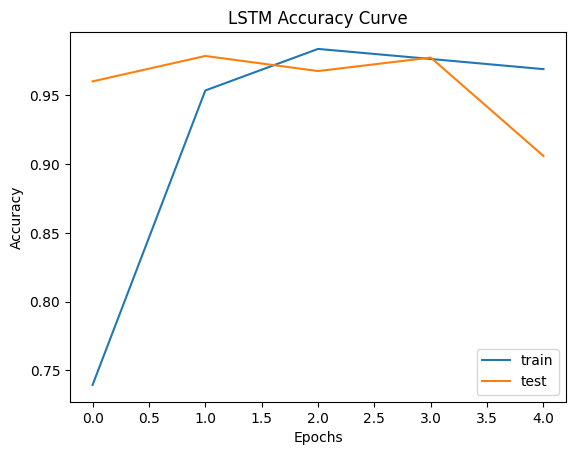

In [61]:
plt.title('LSTM Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(len(acc)),acc, label='train')
plt.plot(range(len(val_acc)),val_acc, label='test')
plt.legend()
plt.show()

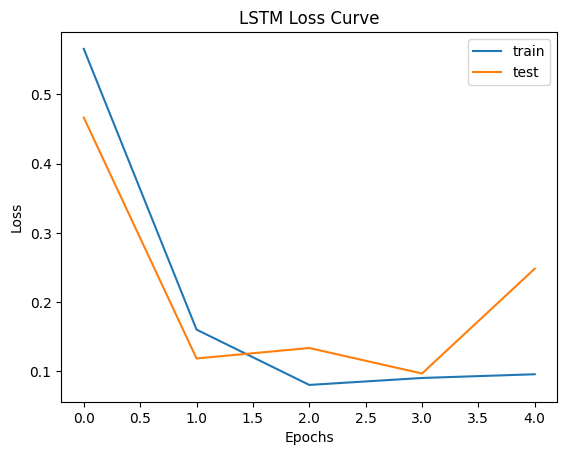

In [62]:
plt.title('LSTM Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(len(loss)),loss, label='train')
plt.plot(range(len(val_loss)),val_loss, label='test')
plt.legend()
plt.show()

In [63]:
# Generate news articles using the trained model
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
for genre in ["sport", "politic"]:
    seed_text = "In today's news, the " + genre + " section reported that"
    for i in range(10):
        encoded_text = tokenizer.texts_to_sequences([seed_text])[0]
        padded_text = pad_sequences([encoded_text], maxlen=max_len, padding="post")
        prediction = model.predict(padded_text)[0]
        predicted_word_index = np.argmax(prediction)
        predicted_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                predicted_word = word
                break
        seed_text += " " + predicted_word
    print("Generated " + genre + " news article: " + seed_text)

1/1 [==============================] - 0s 47ms/step
Generated sport news article: In today's news, the sport section reported that          
1/1 [==============================] - 0s 44ms/step
Generated politic news article: In today's news, the politic section reported that          
